<a href="https://colab.research.google.com/github/UnplugCharger/week-14/blob/master/WEEK_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

## Principal Component Analysis

In [1]:
sales <- read.csv('/content/Supermarket_Dataset_1 - Sales Data.csv')

In [2]:
#previewing the dataset 

head(sales)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [3]:
dim(sales)

[1] 1000   16

Our dataset has 1000 rows and  16 columns 

this is a pretty wide dataset . That is why we need to do a dimentionality reduction to it 

In [4]:
str(sales)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

We have 8 numerical columns and 8 catergorical columns in our dataset

In [5]:
# checking if there are any missing values 
sum(is.na(sales))

[1] 0

We have a very clean dataset with no missing values 

In [6]:
# checking for duplicates
duplicated_rows <- sales[duplicated(sales),]
duplicated_rows

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


We have no duplicates in our dataset

In [11]:
# creating a dataset for PCA
pca_df <- sales[,c(6,7,8,12,13,14,15,16)]
head(pca_df)

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


In [12]:

# Ensuring our variances is not 0
# Ensuring our variances is not 0
pca_df <- pca_df[ , which(apply(pca_df, 2, var) != 0)]
head(pca_df)

,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,29.8865,4.1,627.6165


In [13]:
myPr <- prcomp(pca_df,scale=TRUE)
myPr

Standard deviations (1, .., p=7):
[1] 2.218512e+00 1.000200e+00 9.938793e-01 3.000112e-01 3.131600e-16
[6] 1.457168e-16 3.219253e-17

Rotation (n x k) = (7 x 7):
                     PC1          PC2          PC3         PC4           PC5
Unit.price   -0.29176275  0.270866890 -0.693584569 -0.60037161  2.547868e-16
Quantity     -0.32452880 -0.212748396  0.633152868 -0.66972877 -2.299601e-17
Tax          -0.44977957  0.004196356  0.001836202  0.21835146 -2.606262e-01
cogs         -0.44977957  0.004196356  0.001836202  0.21835146 -3.390514e-01
gross.income -0.44977957  0.004196356  0.001836202  0.21835146 -2.646572e-01
Rating        0.01867926  0.938775165  0.343575909  0.01754621  1.107804e-17
Total        -0.44977957  0.004196356  0.001836202  0.21835146  8.643348e-01
                       PC6           PC7
Unit.price   -1.811615e-16 -1.661260e-16
Quantity     -2.058526e-16 -1.681903e-16
Tax          -4.896796e-01 -6.650473e-01
cogs          7.933264e-01 -7.534812e-02
gross.income -3.5

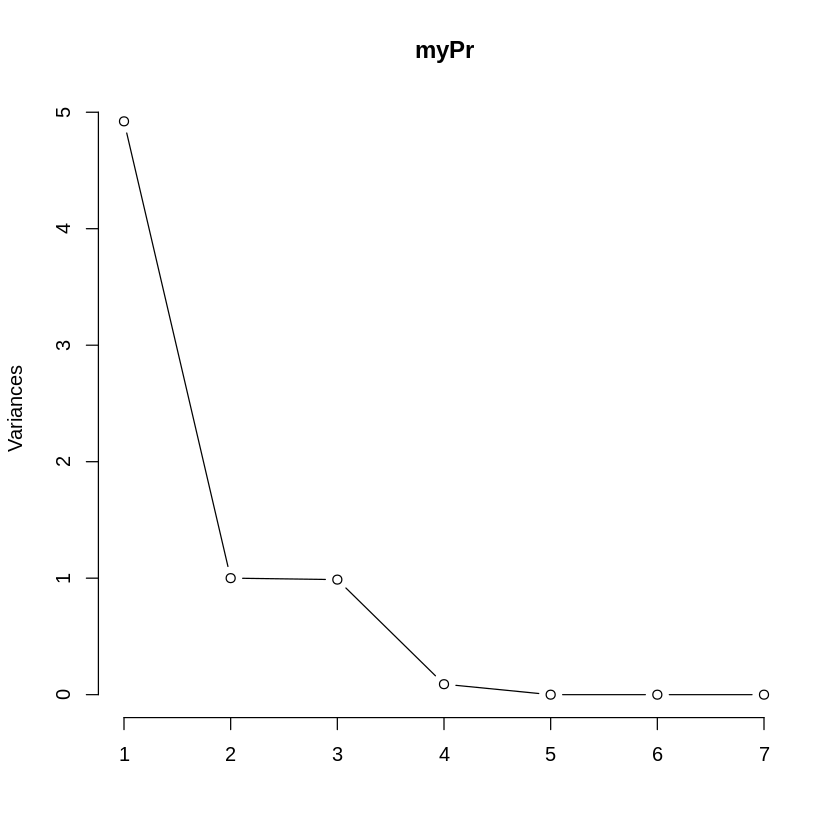

In [14]:
plot(myPr,type = 'l')

Most of the variability in our data are in the first second and third component of our PCa

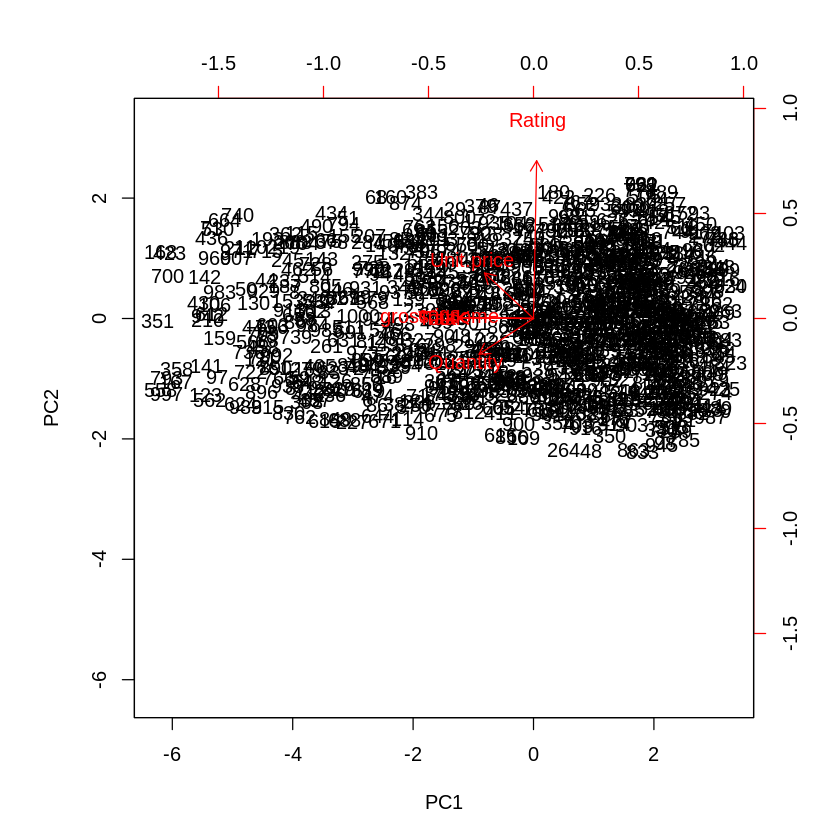

In [15]:
biplot(myPr,scale = 0)

The above doest really helpus group our data points so we will try and plot them using ggplots

In [22]:
# Then Loading our ggbiplot library
#  
install.packages("tidyverse")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [31]:
pca_df2 <- cbind(sales,myPr$x[,1:3])

In [32]:
head(pca_df2)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,PC1,PC2,PC3
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,-2.0053643,1.26346268,0.2568841
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200,2.3061287,1.04275950,1.4649372
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255,-0.1863586,0.03066994,0.6532131
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,-1.5041579,0.63584271,0.7628867
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,-2.7995421,-0.68766184,-0.8044468
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,-2.7529768,-1.35302951,-1.0204669


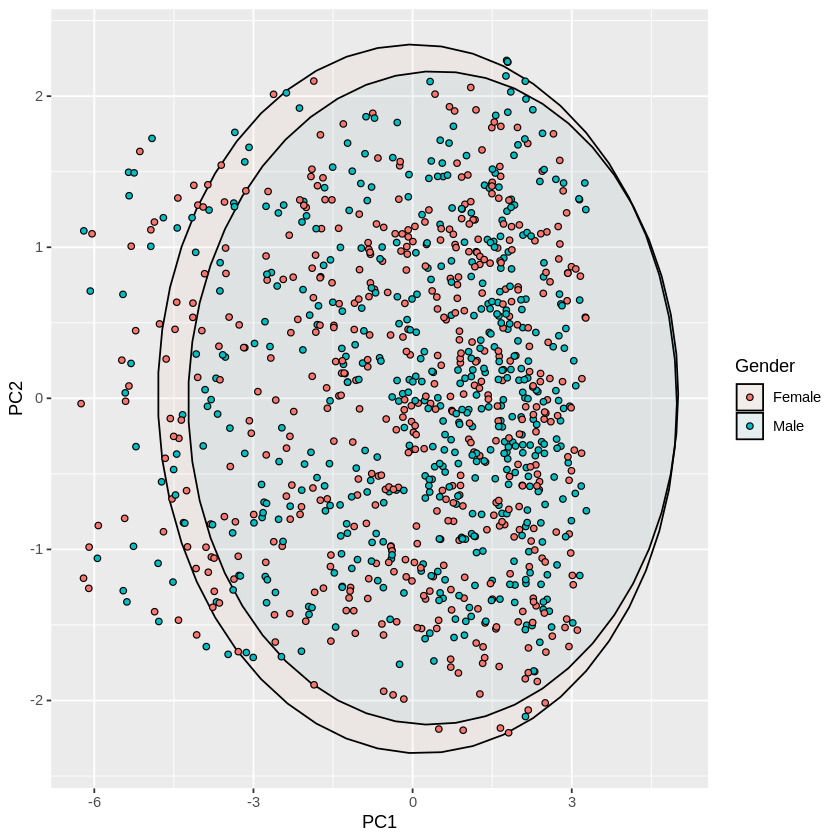

In [47]:
ggplot(pca_df2,aes(PC1,PC2,PC3,col=Product.line,fill=Gender))+
 stat_ellipse(geom = 'polygon',col='black',alpha=0.05)+
 geom_point(col='black',shape=21)

Our customers overlap in so many area hence using principal component analysis to group them into different catergories has failed

# Feature Selection in Unsupervised Learning

## This will be done by removing highly correlated features from our dataframe using the Filter Method

In [49]:
feature_df <- pca_df2[sapply(pca_df2,is.numeric)]
head(feature_df)

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total,PC1,PC2,PC3
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715,-2.0053643,1.26346268,0.2568841
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200,2.3061287,1.04275950,1.4649372
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255,-0.1863586,0.03066994,0.6532131
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480,-1.5041579,0.63584271,0.7628867
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785,-2.7995421,-0.68766184,-0.8044468
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165,-2.7529768,-1.35302951,-1.0204669


In [ ]:
install.packages("caret")
library(caret)

In [ ]:
install.packages("corrplot")
library(corrplot)

In [60]:
drops <- c('gross.margin.percentage')
feature_df<-feature_df[ , !(names(feature_df) %in% drops)]

In [61]:
correlationMatrix <- cor(feature_df)

In [62]:
correlationMatrix

,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total,PC1,PC2,PC3
Unit.price,1.000000000,0.01077756,0.633962089,0.633962089,0.633962089,-0.008777507,0.633962089,-6.472793e-01,2.709210e-01,-6.893394e-01
Quantity,0.010777564,1.00000000,0.705510186,0.705510186,0.705510186,-0.015814905,0.705510186,-7.199712e-01,-2.127909e-01,6.292775e-01
Tax,0.633962089,0.70551019,1.000000000,1.000000000,1.000000000,-0.036441705,1.000000000,-9.978416e-01,4.197195e-03,1.824964e-03
cogs,0.633962089,0.70551019,1.000000000,1.000000000,1.000000000,-0.036441705,1.000000000,-9.978416e-01,4.197195e-03,1.824964e-03
gross.income,0.633962089,0.70551019,1.000000000,1.000000000,1.000000000,-0.036441705,1.000000000,-9.978416e-01,4.197195e-03,1.824964e-03
Rating,-0.008777507,-0.01581490,-0.036441705,-0.036441705,-0.036441705,1.000000000,-0.036441705,4.144017e-02,9.389628e-01,3.414730e-01
Total,0.633962089,0.70551019,1.000000000,1.000000000,1.000000000,-0.036441705,1.000000000,-9.978416e-01,4.197195e-03,1.824964e-03
PC1,-0.647279280,-0.71997117,-0.997841555,-0.997841555,-0.997841555,0.041440174,-0.997841555,1.000000e+00,-2.054225e-16,3.065868e-16
PC2,0.270921037,-0.21279093,0.004197195,0.004197195,0.004197195,0.938962831,0.004197195,-2.054225e-16,1.000000e+00,-2.918574e-16
PC3,-0.689339359,0.62927754,0.001824964,0.001824964,0.001824964,0.341472990,0.001824964,3.065868e-16,-2.918574e-16,1.000000e+00


In [63]:
## getting the highlycorrelated features
high_corr <- findCorrelation(correlationMatrix, cutoff=0.75)

In [64]:
high_corr

[1] 8 3 4 5 9

In [65]:
names(feature_df[,high_corr])

[1] "PC1"          "Tax"          "cogs"         "gross.income" "PC2"

we used the PC1 components as engineered features and now we find that they are high correlated features. We could  compare their correlation with the target variable and then decide on which ones to use for the modeling and which ones not to use. The ones with the highest correlation to the target will be selected for modeling.

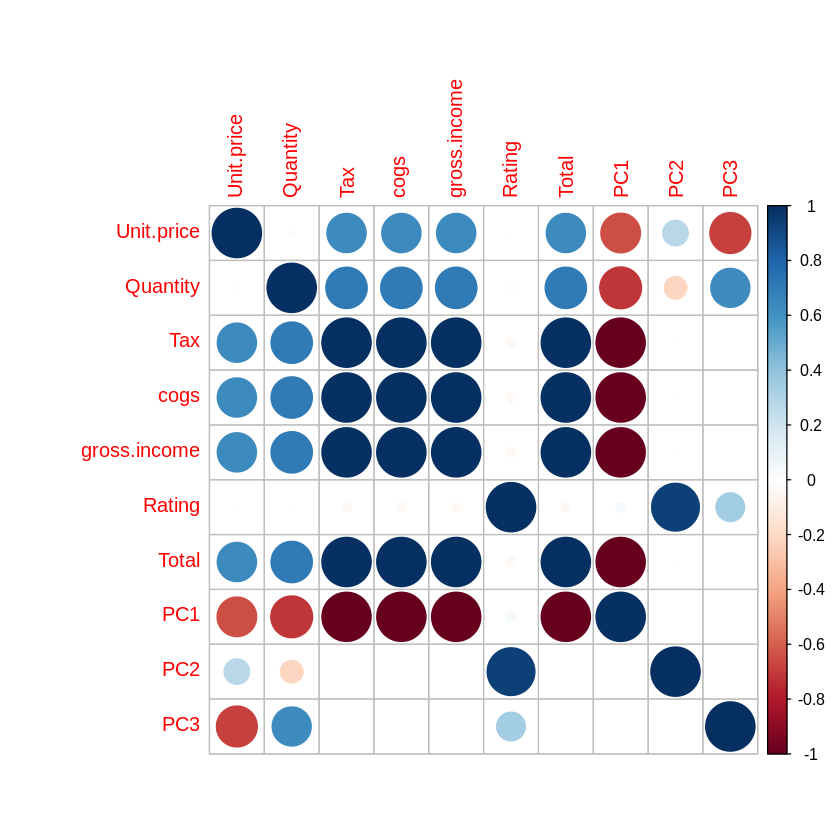

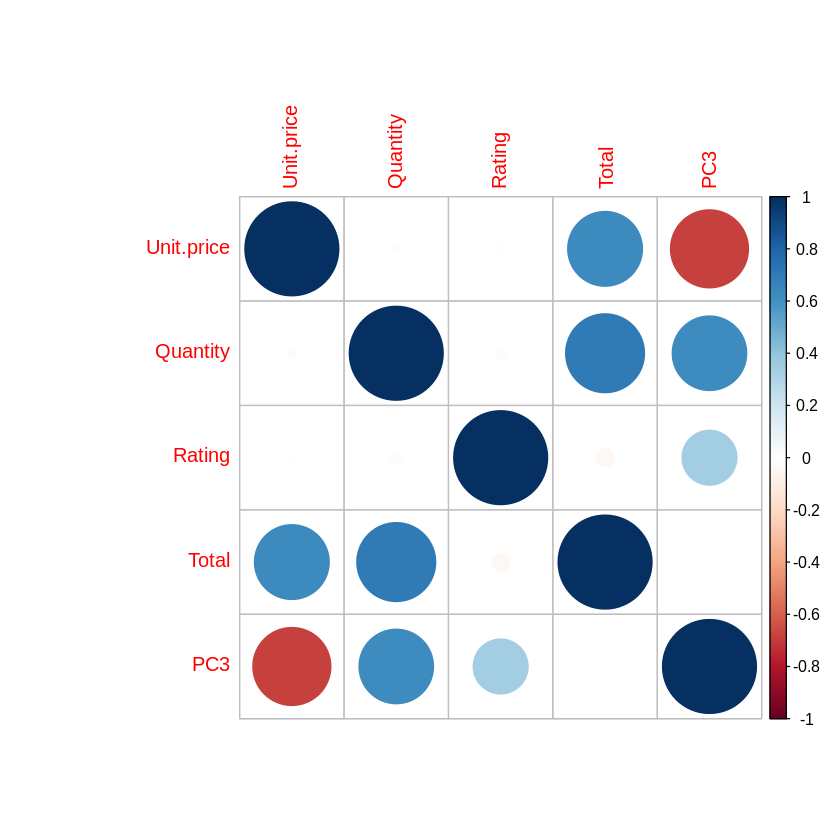

In [67]:
# Removing the highly correlated columns in our dataset

sales99<-feature_df[-high_corr]
# Performing our graphical comparison

corrplot(correlationMatrix)
corrplot(cor(sales99))

Removing allthe highly correlated features like I have done above is not ideal , we could remove one in each correlated pairs 

# Association Analysis

In [70]:
asso_df= read.csv('/content/Supermarket_Sales_Dataset II.csv')

In [71]:
head(asso_df)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,NA
2,chutney,,,,,,,,,,,,,,,,,,,NA
3,turkey,avocado,,,,,,,,,,,,,,,,,,NA
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,NA
5,low fat yogurt,,,,,,,,,,,,,,,,,,,NA
6,whole wheat pasta,french fries,,,,,,,,,,,,,,,,,,NA


In [ ]:
# install the required arules library 
install.packages("arules")
library(arules)

In [73]:
summary(asso_df)

               shrimp              almonds              avocado    
 mineral water    : 577                :1754                :3112  
 burgers          : 576   mineral water: 484   mineral water: 375  
 turkey           : 458   spaghetti    : 411   spaghetti    : 279  
 chocolate        : 391   eggs         : 302   eggs         : 225  
 frozen vegetables: 373   ground beef  : 291   milk         : 213  
 spaghetti        : 354   french fries : 243   french fries : 180  
 (Other)          :4771   (Other)      :4015   (Other)      :3116  
       vegetables.mix       green.grapes      whole.weat.flour
              :4156               :4972               :5637   
 mineral water: 201   green tea   : 153   french fries: 107   
 eggs         : 181   eggs        : 134   eggs        : 102   
 french fries : 174   french fries: 130   green tea   : 100   
 spaghetti    : 167   chocolate   : 115   chocolate   :  71   
 milk         : 149   milk        : 114   pancakes    :  69   
 (Other)      :

In [ ]:
install.packages("arulesViz")
library(arulesViz)

In [75]:
#using apriori function to build the rules
r <- apriori(asso_df,parameter=list(support=0.95, confidence = 0.9,minlen=6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.95      6
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7125 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1280 item(s), 7500 transaction(s)] done [0.04s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.00s].
writing ... [837 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [76]:
summary(r)

set of 837 rules

rule length distribution (lhs + rhs):sizes
  6   7   8   9 
504 252  72   9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.000   6.000   6.000   6.505   7.000   9.000 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.9660   Min.   :0.9691   Min.   :0.9660   Min.   :1.000  
 1st Qu.:0.9660   1st Qu.:1.0000   1st Qu.:0.9660   1st Qu.:1.000  
 Median :0.9660   Median :1.0000   Median :0.9660   Median :1.003  
 Mean   :0.9703   Mean   :0.9977   Mean   :0.9726   Mean   :1.006  
 3rd Qu.:0.9796   3rd Qu.:1.0000   3rd Qu.:0.9796   3rd Qu.:1.012  
 Max.   :0.9939   Max.   :1.0000   Max.   :0.9968   Max.   :1.021  
     count     
 Min.   :7245  
 1st Qu.:7245  
 Median :7245  
 Mean   :7277  
 3rd Qu.:7347  
 Max.   :7454  

mining info:
    data ntransactions support confidence
 asso_df          7500    0.95        0.9

We have a confidence close to 1

our support  is 0.95 which is good enough 

lifts are higher than one


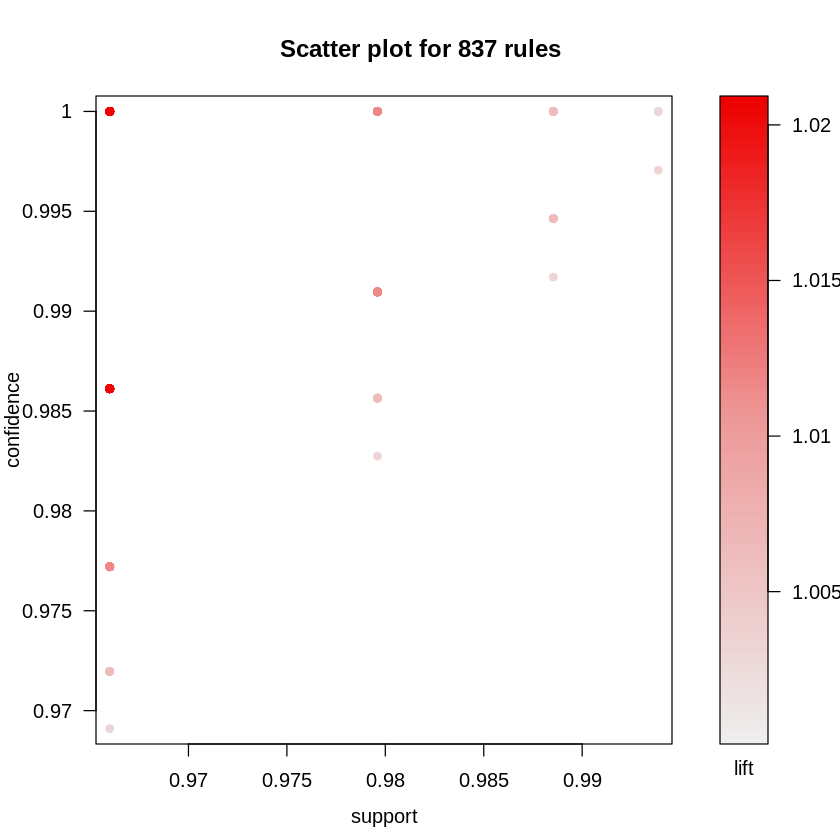

In [78]:
# Visualising our rules
plot(r,method = "scatterplot",jitter=0)

From the visualisation we can conclude that our rules have a good lift , confidence and support 

In [80]:
# Inspecting the first ten rules 
# 
inspect(r[1:10])

     lhs                     rhs                  support confidence coverage     lift count
[1]  {low.fat.yogurt=,                                                                      
      green.tea=,                                                                           
      honey=,                                                                               
      salad=,                                                                               
      mineral.water=}     => {salmon=}              0.966  1.0000000   0.9660 1.000934  7245
[2]  {low.fat.yogurt=,                                                                      
      green.tea=,                                                                           
      honey=,                                                                               
      salad=,                                                                               
      salmon=}            => {mineral.water=}       0.966  1.0000000  

In [83]:
# Ordering the rules by support and then looking at the first 10
r2 <- sort(r, by="support", decreasing=TRUE)
inspect(r2[1:10])

     lhs                     rhs                    support confidence  coverage     lift count
[1]  {salad=,                                                                                  
      mineral.water=,                                                                          
      salmon=,                                                                                 
      antioxydant.juice=,                                                                      
      frozen.smoothie=}   => {spinach=}           0.9938667  1.0000000 0.9938667 1.000267  7454
[2]  {salad=,                                                                                  
      mineral.water=,                                                                          
      salmon=,                                                                                 
      antioxydant.juice=,                                                                      
      spinach=}           => {frozen.smo

Warning message:
“plot: Too many rules supplied. Only plotting the best 100 rules using ‘support’ (change control parameter max if needed)”


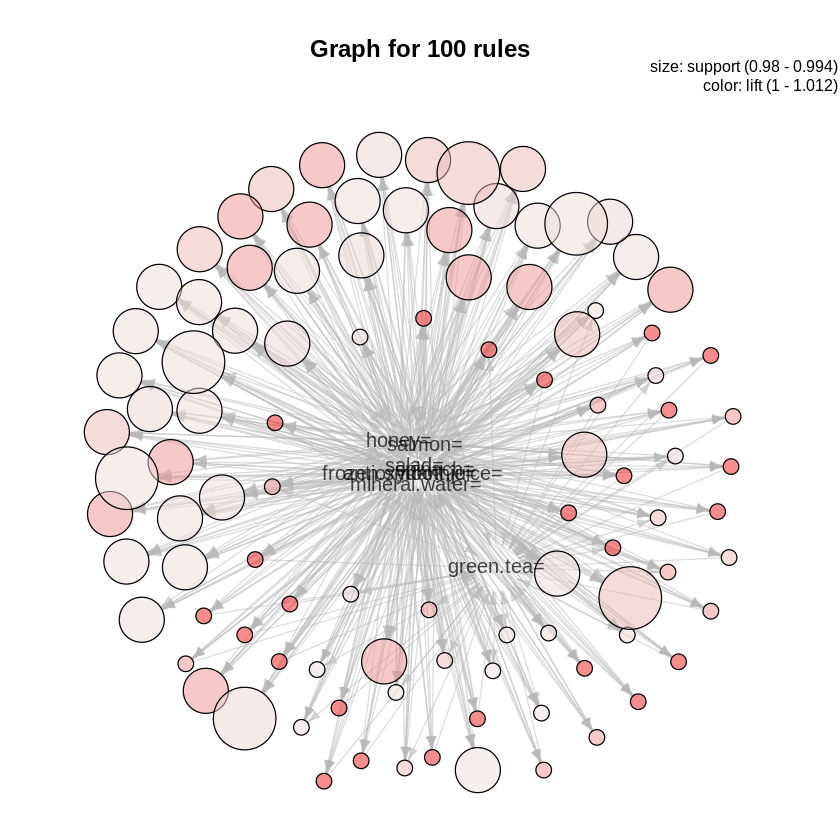

In [82]:
## Visualising the sorted rules



plot(r2,method = "graph",)

The above shows the top 100 rules ordered by support

Now lets take a scenario in which the supermarket wants to increase sales and they want to increase their cart values to customers who buy low.fat.yourghurt 

they can create and use the following rule 

In [85]:
low_fat_rule <- subset(r, subset = rhs %pin% "low.fat.yogurt")

By ordering the above rules by confidence they will be able to get products that are always likely bought together with the low fat yourghut

In [86]:
r4<-sort(low_fat_rule, by="confidence", decreasing=TRUE)
inspect(r4[1:5])

    lhs                     rhs               support confidence coverage     lift count
[1] {green.tea=,                                                                        
     honey=,                                                                            
     salad=,                                                                            
     mineral.water=,                                                                    
     salmon=}            => {low.fat.yogurt=}   0.966  0.9861168   0.9796 1.020825  7245
[2] {green.tea=,                                                                        
     honey=,                                                                            
     salad=,                                                                            
     mineral.water=,                                                                    
     antioxydant.juice=} => {low.fat.yogurt=}   0.966  0.9861168   0.9796 1.020825  7245
[3] {green.tea=,     

from the above we can see that the frequently bought together with low fat yourghut are 
1. green tea
2. honey
3. salad
4. mineral water 
5. salmon

# Anomaly Detection